
# DAA practical no 1:
# Write a program non-recursive and recursive program to calculate Fibonacci numbers and analyze their time and space complexity.





In [ ]:
fibonacci_recursive(n - 1)+fib[-1] + fib[-2]

In [63]:
def fibonacci_non_recursive(n):
    fib = [0, 1]
    while len(fib) <= n:
        fib.append(fib[-1] + fib[-2])
    return fib

def fibonacci_recursive(n):
    if n == 0:
        return [0]
    elif n == 1:
        return [0, 1]
    else:
        previous_sequence = fibonacci_recursive(n - 1)
        new_number = previous_sequence[-1] + previous_sequence[-2]
        return previous_sequence + [new_number]

n = 6

print("Fibonacci sequence up to Fibonacci({}) using non-recursive method:".format(n))
print(fibonacci_non_recursive(n))

print("Fibonacci sequence up to Fibonacci({}) using recursive method:".format(n))
print(fibonacci_recursive(n))


Fibonacci sequence up to Fibonacci(6) using non-recursive method:
[0, 1, 1, 2, 3, 5, 8]
Fibonacci sequence up to Fibonacci(6) using recursive method:
[0, 1, 1, 2, 3, 5, 8]


Let's analyze the time and space complexity of the provided programs for calculating Fibonacci numbers:

Non-Recursive Program:
Time Complexity: O(n)
Space Complexity: O(n)
In the non-recursive program, the time complexity is O(n) because it iterates through the Fibonacci sequence once, filling in a list from 2 to n. The space complexity is also O(n) because it uses an additional list of size n+1 to store the Fibonacci numbers.

Recursive Program:
Time Complexity: O(2^n)
Space Complexity: O(n) (due to the function call stack)
The recursive program has exponential time complexity, O(2^n), because it recalculates Fibonacci numbers for the same values multiple times, resulting in a significant amount of redundant computation. The space complexity is O(n) because of the function call stack. In the worst case, the stack can have at most n function calls.

So, in summary:

Non-Recursive Program: Time O(n), Space O(n)
Recursive Program: Time O(2^n), Space O(n)
The non-recursive program is significantly more efficient, especially for large values of 'n', as it has a linear time complexity compared to the exponential time complexity of the recursive version.

# PRACTICAL NO 2
## Write a program to solve a fractional Knapsack problem using a greedy method.


In [2]:
def fractional_knapsack(items, capacity):
    items.sort(key=lambda x: -x[1] / x[0])
    V, K = 0, []
    for w, v in items:
        f = min(1, capacity / w)
        V, K, capacity = V + f * v, K + [(w * f, v * f)], capacity - w * f
    return V, K

# Example usage:
items = [(2, 60), (3, 50), (5, 70), (7, 30)]
W = 5
max_value, selected_items = fractional_knapsack(items, W)
print("Maximum value:", max_value)
print("Selected items:", selected_items)


Maximum value: 110.0
Selected items: [(2, 60), (3, 50), (0.0, 0.0), (0.0, 0.0)]


# PRATICAL NO 3
# Write a program to solve a 0-1 Knapsack problem using dynamic programming or branch and bound strategy

In [3]:
def knapsack_01(v, w, c):
    n, dp, s = len(v), [0] * (c + 1), []

    for i in range(n):
        for j in range(c, 0, -1):
            dp[j] = max(dp[j], dp[j - w[i]] + v[i]) if w[i] <= j else dp[j]

    i, j = n - 1, c

    while i >= 0 and j > 0:
        if w[i] <= j and dp[j] != dp[j - w[i]] + v[i]:
            s.append(i)
            j -= w[i]
        i -= 1

    return dp[c], s

# Example usage:
v, w, c = [60, 100, 120], [10, 20, 30], 50
m, s = knapsack_01(v, w, c)
print("Maximum value:", m)
print("Selected items:", s)


Maximum value: 220
Selected items: [1]


# PRACTICAL NO 4
# Design n-Queens matrix having first Queen placed. Use backtracking to place remaining Queens to generate the final n-queen‘s matrix.


In [59]:
def is_safe(board, row, col):
    return all(
        board[i] != col and abs(board[i] - col) != row - i
        for i in range(row)
    )

def solve_n_queens(board, row, n):
    if row == n:
        return True

    for col in range(n):
        if is_safe(board, row, col):
            board[row] = col
            if solve_n_queens(board, row + 1, n):
                return True

    return False

n = 4  # Change this to the desired board size
board = [-1] * n

if solve_n_queens(board, 0, n):
    for row in board:
        print(" ".join("Q" if i == row else "." for i in range(n)))
else:
    print("No solution found.")


. Q . .
. . . Q
Q . . .
. . Q .


In [60]:
matrix = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
]

for row in matrix:
    for element in row:
        print(element, end="\t")
    print()  # Move to the next line after each row


1	2	3	4	
5	6	7	8	
9	10	11	12	
13	14	15	16	


# PRACTICAL NO 5
# Write a program for analysis of quick sort by using deterministic and randomized variant.


In [64]:
import random
import time

def partition(arr, low, high, randomized=False):
    if randomized:
        pivot_idx = random.randint(low, high)
        arr[pivot_idx], arr[low] = arr[low], arr[pivot_idx]
    pivot, left, right = arr[low], low + 1, high
    while True:
        while left <= right and arr[left] <= pivot:
            left += 1
        while arr[right] >= pivot and right >= left:
            right -= 1
        if right < left:
            break
        arr[left], arr[right] = arr[right], arr[left]
    arr[low], arr[right] = arr[right], arr[low]
    return right

def quick_sort(arr, low, high, randomized=False):
    if low < high:
        pivot_idx = partition(arr, low, high, randomized)
        quick_sort(arr, low, pivot_idx - 1, randomized)
        quick_sort(arr, pivot_idx + 1, high, randomized)

def analyze_quick_sort_performance(sizes):
    print("Input Size\tDeterministic Time\tRandomized Time")
    for size in sizes:
        arr = [random.randint(1, 10000) for _ in range(size)]
        arr_copy = arr.copy()
        start_time = time.time()
        quick_sort(arr, 0, size - 1)
        end_time = time.time()
        det_time = end_time - start_time
        start_time = time.time()
        quick_sort(arr_copy, 0, size - 1, randomized=True)
        end_time = time.time()
        rnd_time = end_time - start_time
        print(f"{size}\t\t{det_time:.6f}\t\t{rnd_time:.6f}")

analyze_quick_sort_performance([100, 1000, 10000])


Input Size	Deterministic Time	Randomized Time
100		0.000997		0.000000
1000		0.003990		0.002990
10000		0.029921		0.050901


# deterministic variant.

In [33]:
import random, time

def partition(arr, low, high):
    pivot = arr[low]
    left, right = low + 1, high
    while left <= right:
        while left <= right and arr[left] <= pivot: left += 1
        while arr[right] >= pivot and right >= left: right -= 1
        if right < left:
            break
        arr[left], arr[right] = arr[right], arr[left]
    arr[low], arr[right] = arr[right], arr[low]
    return right

def quick_sort(arr, low, high ):
    if low < high:
        pivot_idx = partition(arr, low, high)
        quick_sort(arr, low, pivot_idx - 1)
        quick_sort(arr, pivot_idx + 1, high)

def analyze_quick_sort_performance(sizes):
    print("Input Size\tDeterministic Time")
    for size in sizes:
        arr = [random.randint(1, 10000) for _ in range(size)]
        start_time = time.time()
        quick_sort(arr, 0, size - 1)
        end_time = time.time()
        print(f"{size}\t\t{end_time - start_time:.6f}")

analyze_quick_sort_performance([100, 1000, 10000])


Input Size	Deterministic Time
100		0.000954
1000		0.003004
10000		0.042854


# # ML_1

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("uber.csv")


In [9]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [10]:
df=df.drop(['Unnamed: 0','key'],axis=1)

In [11]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [12]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)


In [15]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime)

In [16]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


In [18]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [21]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace=True)

In [22]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     1
passenger_count      0
dtype: int64

In [24]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)

In [25]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
dtype: object

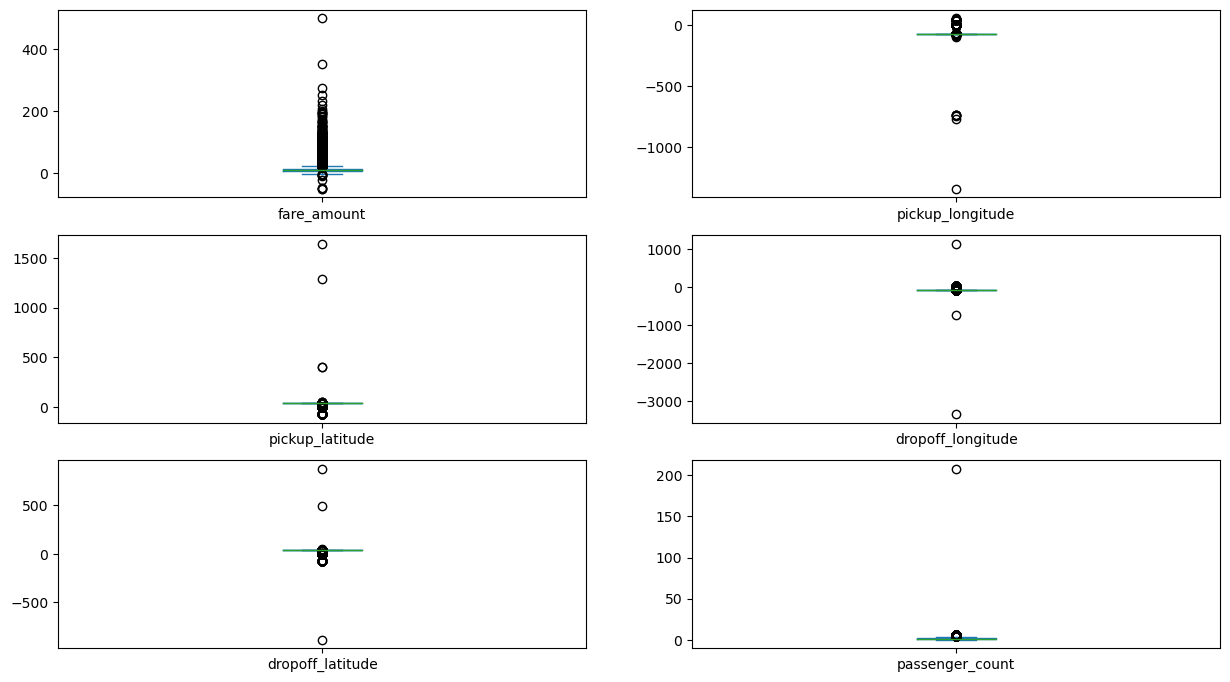

In [28]:

df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))

In [34]:
def treat_outliers_all(df1 , col_list):
      for c in col_list:
        df1 = remove_outlier(df , c)
        return df1
df = treat_outliers_all(df , df.iloc[: , 0::])


NameError: name 'remove_outlier' is not defined

In [39]:
stortions = [] # Within Cluster Sum of Squares from the centroid
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
     distortions.append(kmeanModel.inertia_

IndentationError: unexpected indent (509730727.py, line 6)

<Axes: >

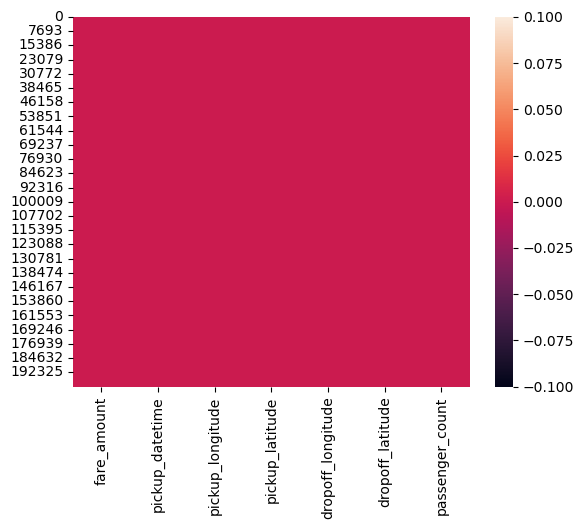

In [37]:
sns.heatmap(df.isnull())

In [38]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

NameError: name 'K' is not defined

<Figure size 1600x800 with 0 Axes>

In [ ]:
def gradient_descent(initial_x, learning_rate, num_iterations, df):
    x = initial_x
    x_history = [x]

    for _ in range(num_iterations):
        gradient = df(x)
        x = x - learning_rate * gradient
        x_history.append(x)

    return x, x_history


#   ML_practical 4

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def f(x):
    return (x+3)**2
def df(x):
    return 2*x+6
def gradiunt_des(initial_x,learning_rate,num_interations):
    x=initial_x
    x_history=[x]
    
    for _ in range(num_iterations):
        gradient=df(x)
        x=x-learning_rate*gradient
        x_history.append(x)
        
    return x,x_history

In [58]:
initial_x = 2
learning_rate = 0.1
num_iterations = 50
x, x_history = gradiunt_des(initial_x, learning_rate, num_iterations)
print("Local minimum: {:.2f}".format(x))

Local minimum: -3.00


In [62]:
def f(x):
    return (x+3)**2
def df(x):
    return 2*x+6

def gradi(initial_x,learning_rate,num_interation):
    x=initial_x
    x_history=[x]
    
    for _ in range(num_interation):
        gradi=df(x)
        x=x-learning_rate*gradi
        x_history.append(x)
    return x,x_history
initial_x=2
learning_rate=0.1
num_interation=50
x,x_history=gradi(initial_x,learning_rate,num_interation)
print("local minima: {:.2f}".format(x))


local minima: -3.00
